Using device: cuda


100%|██████████| 170M/170M [00:04<00:00, 34.9MB/s]


CIFAR-10 dataset loaded
Training samples: 50000
Test samples: 10000

Training with GAUSSIAN NOISE
Model parameters: 870,563
Starting training...
Epoch 1/30, Batch 0/782, Loss: 0.069529
Epoch 1/30, Batch 100/782, Loss: 0.008255
Epoch 1/30, Batch 200/782, Loss: 0.007419
Epoch 1/30, Batch 300/782, Loss: 0.007006
Epoch 1/30, Batch 400/782, Loss: 0.007770
Epoch 1/30, Batch 500/782, Loss: 0.007071
Epoch 1/30, Batch 600/782, Loss: 0.007151
Epoch 1/30, Batch 700/782, Loss: 0.006155
Epoch 1/30:
  Train Loss: 0.007765
  Val Loss: 0.006500
  Learning Rate: 0.001000
--------------------------------------------------
Epoch 2/30, Batch 0/782, Loss: 0.006094
Epoch 2/30, Batch 100/782, Loss: 0.007048
Epoch 2/30, Batch 200/782, Loss: 0.006056
Epoch 2/30, Batch 300/782, Loss: 0.006299
Epoch 2/30, Batch 400/782, Loss: 0.005882
Epoch 2/30, Batch 500/782, Loss: 0.006186
Epoch 2/30, Batch 600/782, Loss: 0.006422
Epoch 2/30, Batch 700/782, Loss: 0.005942
Epoch 2/30:
  Train Loss: 0.006518
  Val Loss: 0.00656

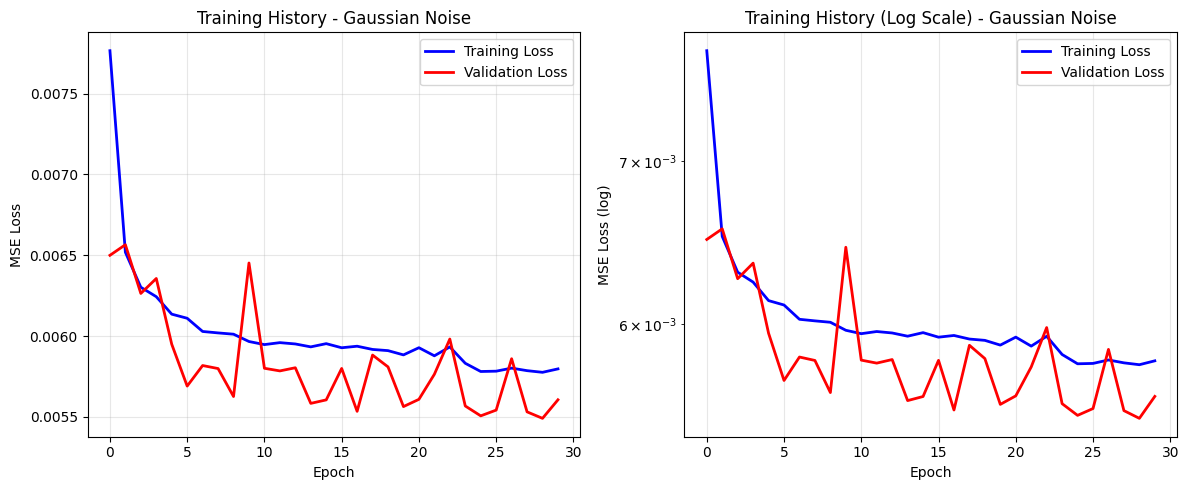


=== Evaluation Results (gaussian noise) ===
MSE: 0.005483
MAE: 0.055786
PSNR: 22.81 dB


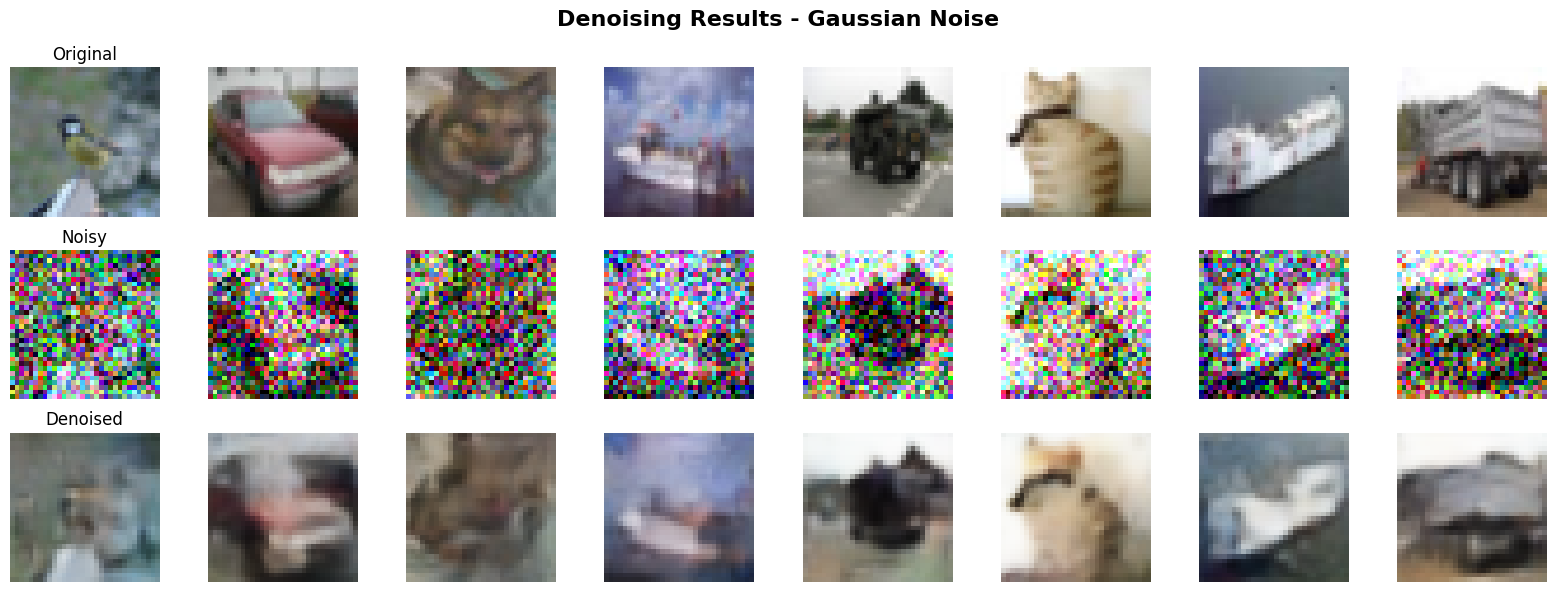

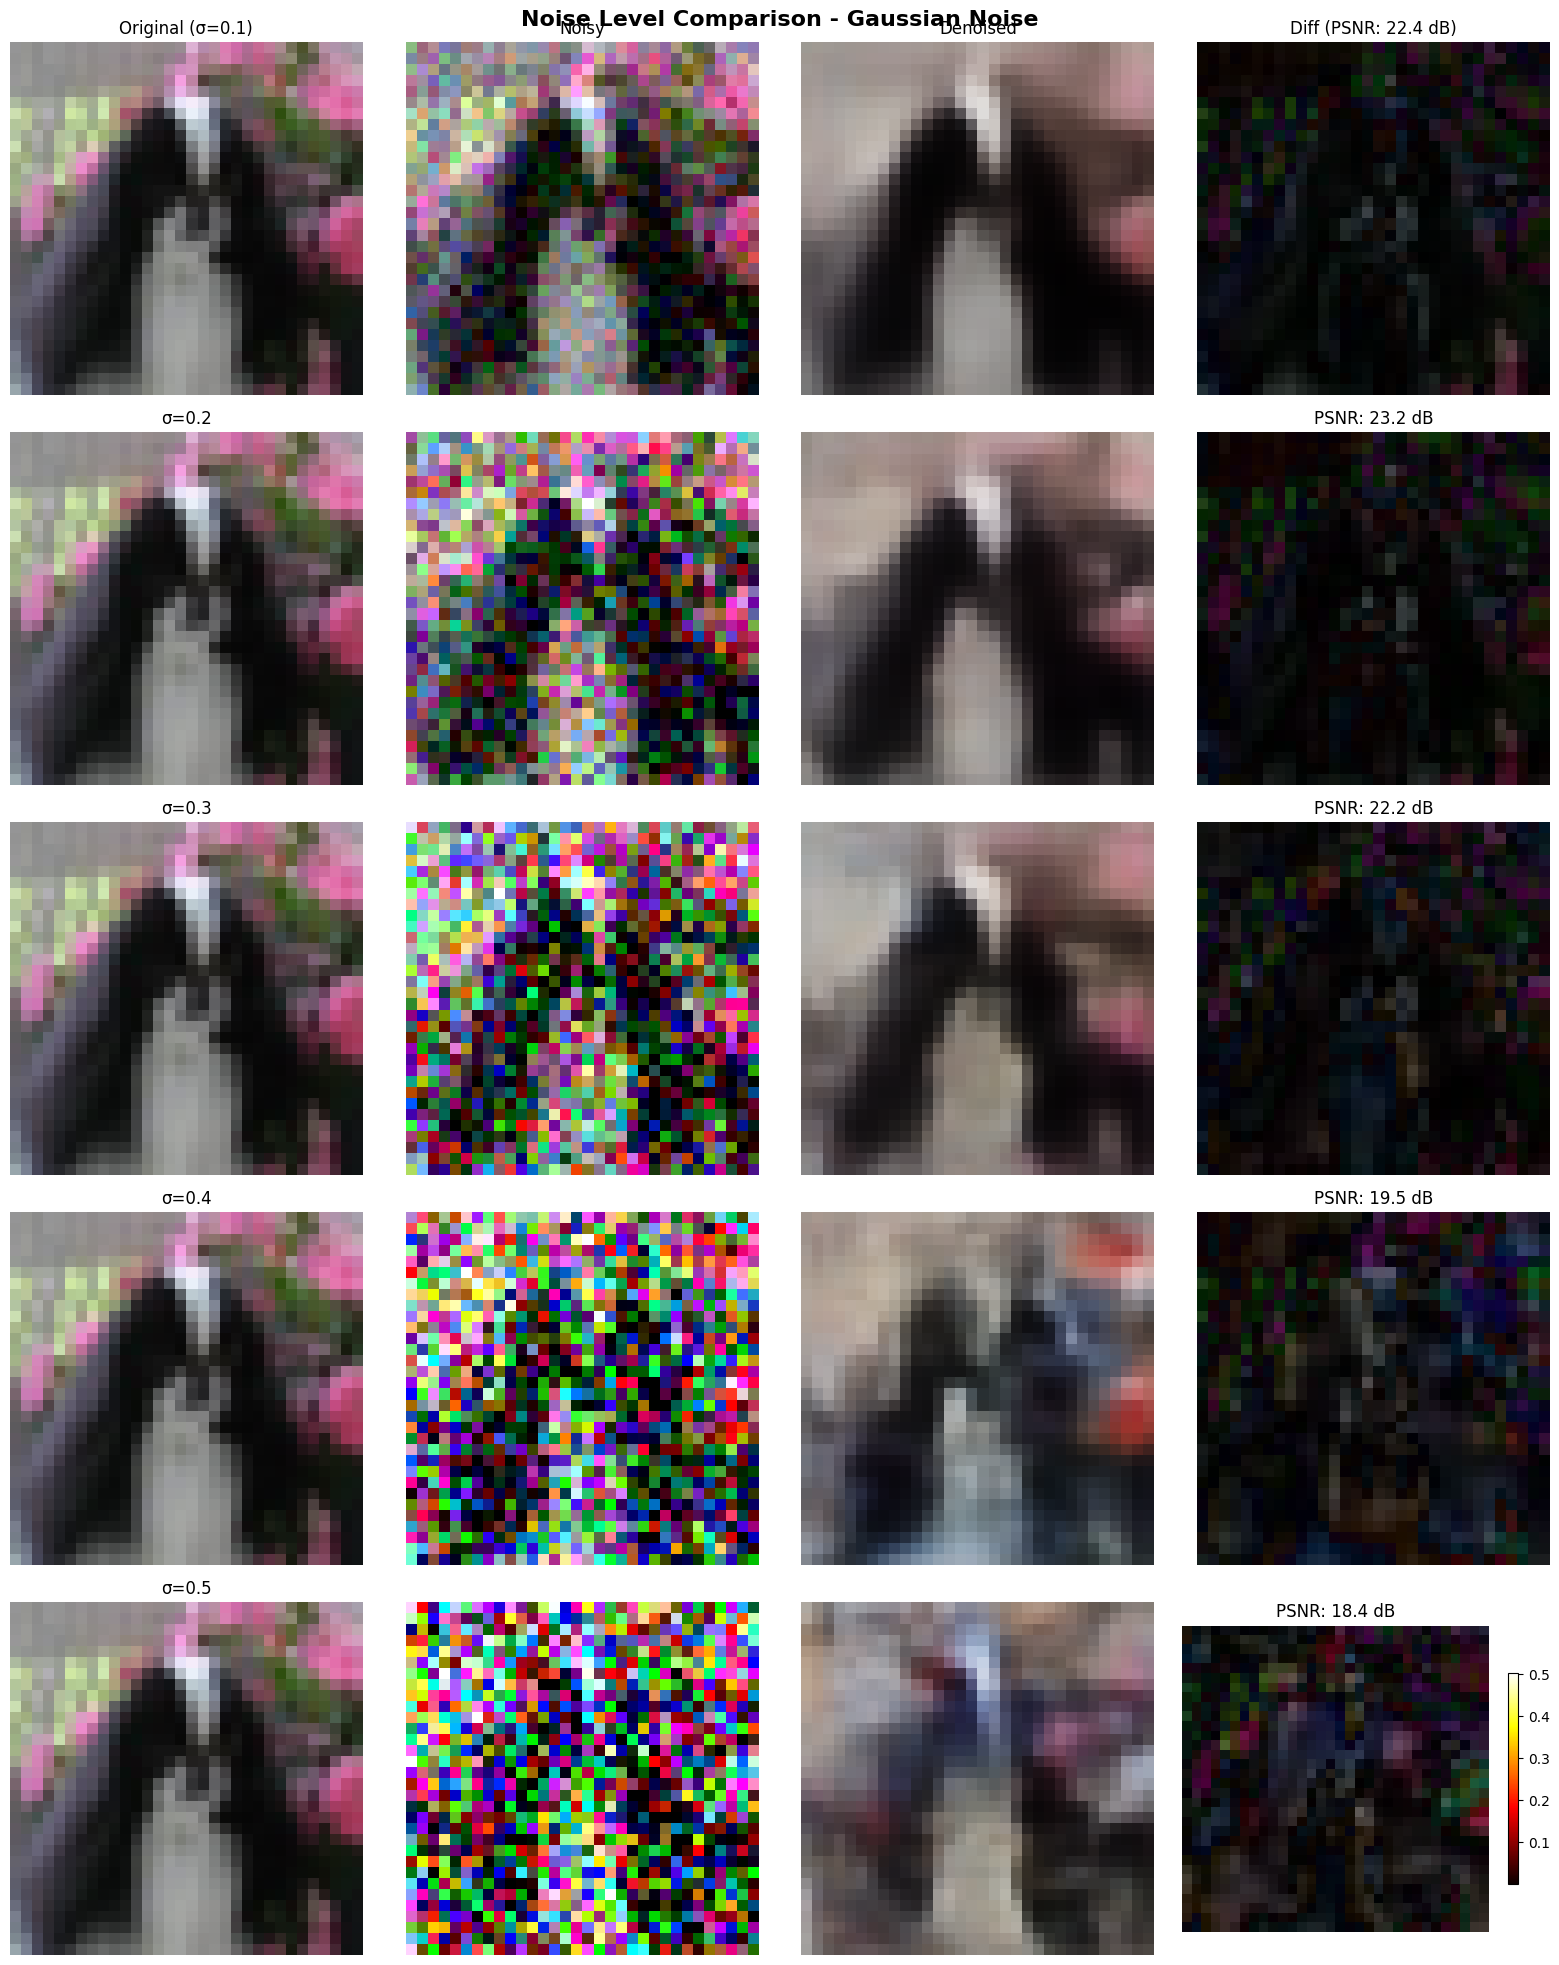


Training with SALT_PEPPER NOISE
Model parameters: 870,563
Starting training...
Epoch 1/30, Batch 0/782, Loss: 0.064700
Epoch 1/30, Batch 100/782, Loss: 0.009065
Epoch 1/30, Batch 200/782, Loss: 0.007975
Epoch 1/30, Batch 300/782, Loss: 0.007978
Epoch 1/30, Batch 400/782, Loss: 0.008264
Epoch 1/30, Batch 500/782, Loss: 0.007457
Epoch 1/30, Batch 600/782, Loss: 0.006871
Epoch 1/30, Batch 700/782, Loss: 0.007295
Epoch 1/30:
  Train Loss: 0.008396
  Val Loss: 0.007467
  Learning Rate: 0.001000
--------------------------------------------------
Epoch 2/30, Batch 0/782, Loss: 0.007370
Epoch 2/30, Batch 100/782, Loss: 0.005899
Epoch 2/30, Batch 200/782, Loss: 0.005471
Epoch 2/30, Batch 300/782, Loss: 0.005608
Epoch 2/30, Batch 400/782, Loss: 0.005449
Epoch 2/30, Batch 500/782, Loss: 0.005174
Epoch 2/30, Batch 600/782, Loss: 0.004861
Epoch 2/30, Batch 700/782, Loss: 0.004315
Epoch 2/30:
  Train Loss: 0.005545
  Val Loss: 0.004120
  Learning Rate: 0.001000
-------------------------------------

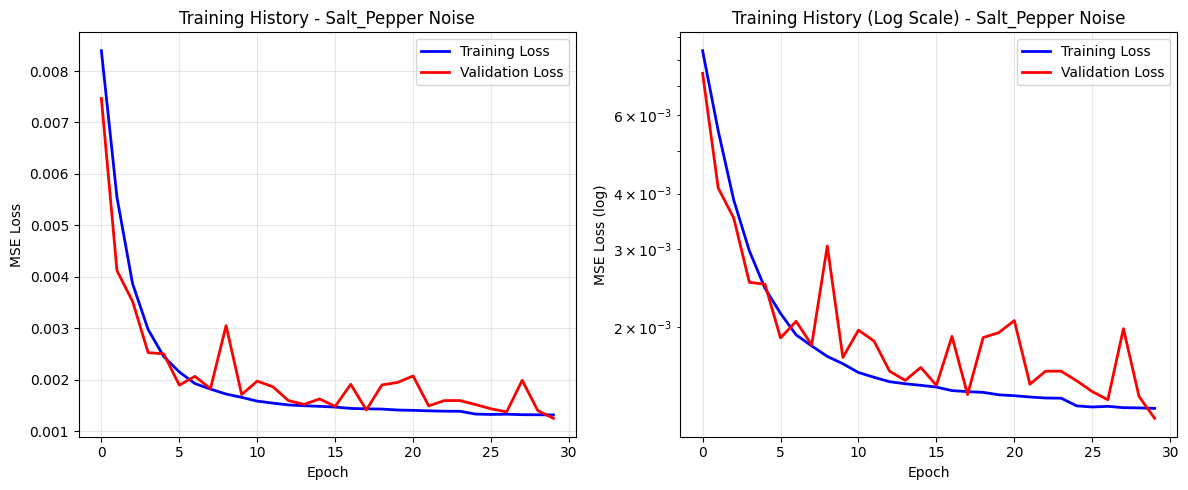


=== Evaluation Results (salt_pepper noise) ===
MSE: 0.001246
MAE: 0.024712
PSNR: 29.45 dB


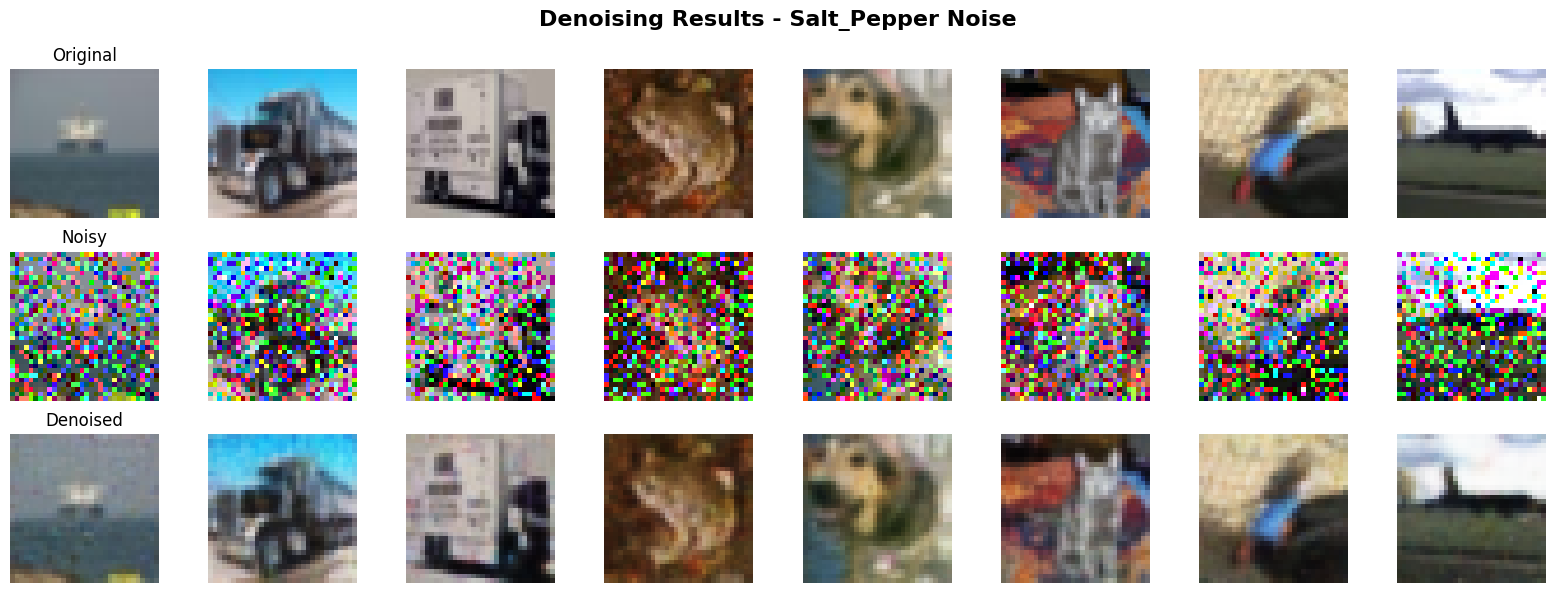


Training with POISSON NOISE
Model parameters: 870,563
Starting training...
Epoch 1/30, Batch 0/782, Loss: 0.069235
Epoch 1/30, Batch 100/782, Loss: 0.001857
Epoch 1/30, Batch 200/782, Loss: 0.001405
Epoch 1/30, Batch 300/782, Loss: 0.001743
Epoch 1/30, Batch 400/782, Loss: 0.003023
Epoch 1/30, Batch 500/782, Loss: 0.001082
Epoch 1/30, Batch 600/782, Loss: 0.001170
Epoch 1/30, Batch 700/782, Loss: 0.001096
Epoch 1/30:
  Train Loss: 0.002062
  Val Loss: 0.001272
  Learning Rate: 0.001000
--------------------------------------------------
Epoch 2/30, Batch 0/782, Loss: 0.001035
Epoch 2/30, Batch 100/782, Loss: 0.001326
Epoch 2/30, Batch 200/782, Loss: 0.001135
Epoch 2/30, Batch 300/782, Loss: 0.000910
Epoch 2/30, Batch 400/782, Loss: 0.001315
Epoch 2/30, Batch 500/782, Loss: 0.000983
Epoch 2/30, Batch 600/782, Loss: 0.001287
Epoch 2/30, Batch 700/782, Loss: 0.001302
Epoch 2/30:
  Train Loss: 0.001278
  Val Loss: 0.000969
  Learning Rate: 0.001000
-----------------------------------------

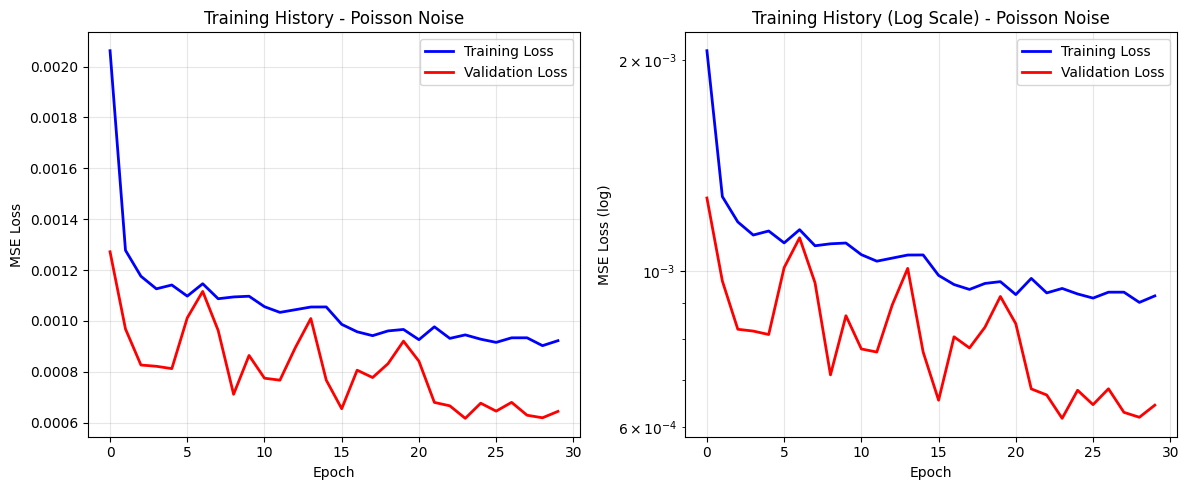


=== Evaluation Results (poisson noise) ===
MSE: 0.000616
MAE: 0.019254
PSNR: 32.25 dB


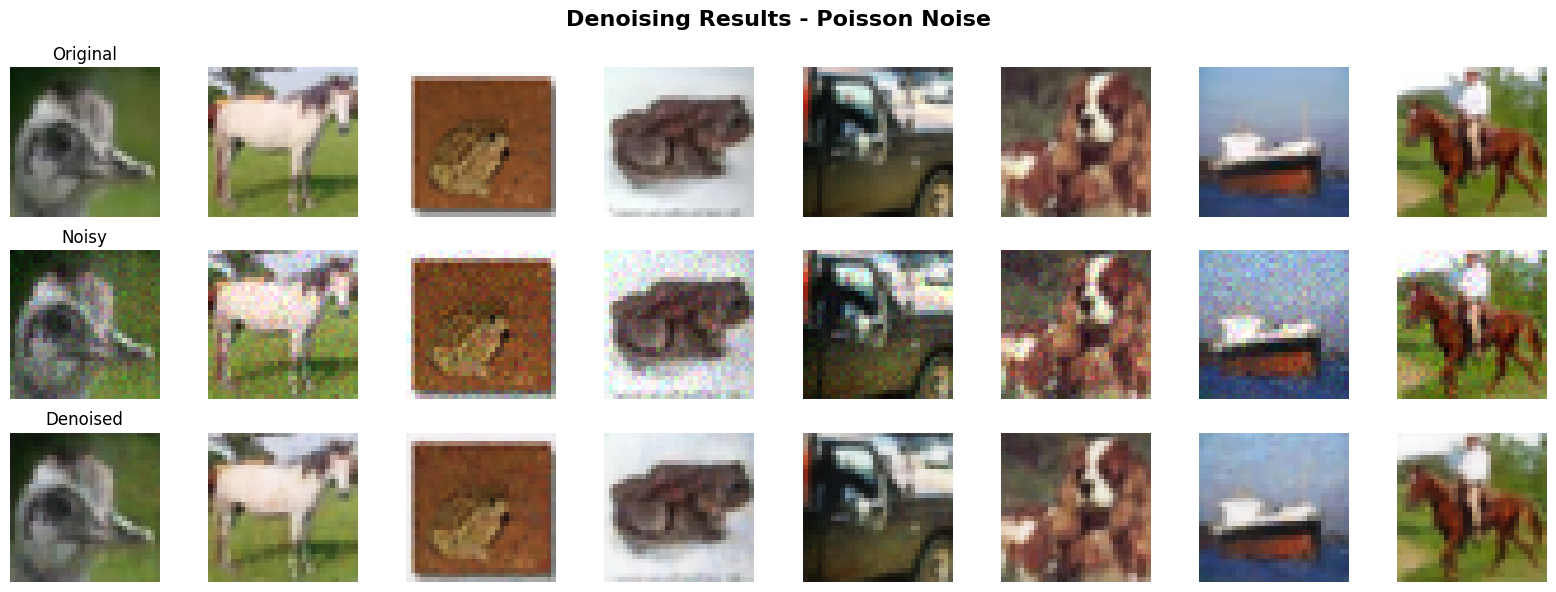

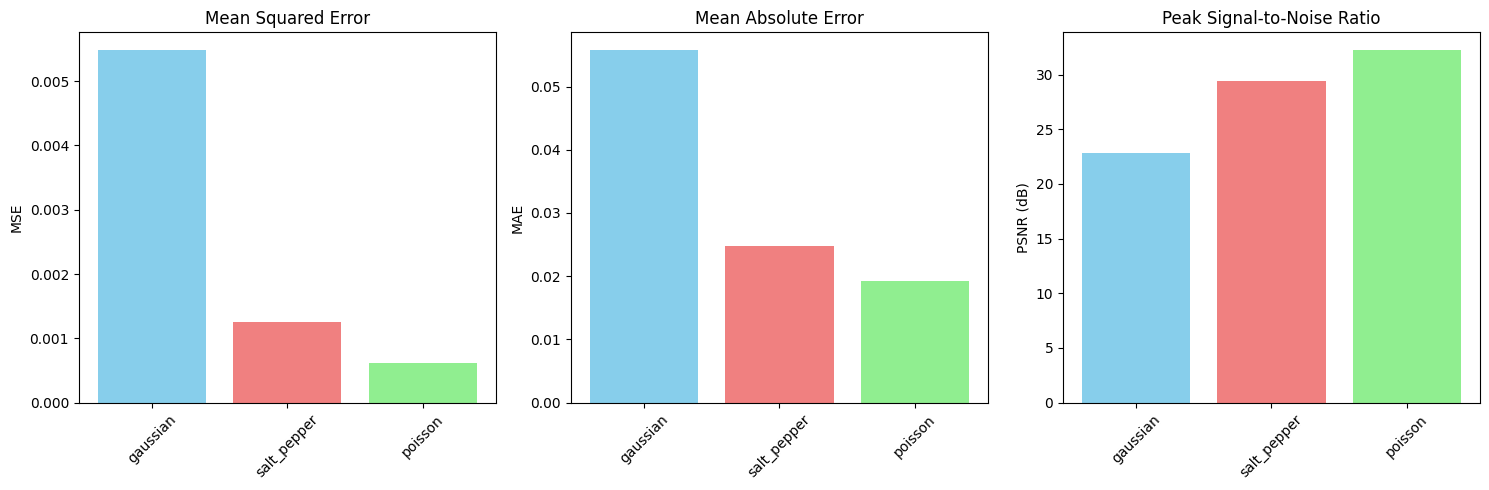


DENOISING AUTOENCODER TRAINING COMPLETED!

Final Results Summary:
Gaussian Noise - MSE: 0.005483, MAE: 0.055786, PSNR: 22.81 dB
Salt_Pepper Noise - MSE: 0.001246, MAE: 0.024712, PSNR: 29.45 dB
Poisson Noise - MSE: 0.000616, MAE: 0.019254, PSNR: 32.25 dB

Generated files:
- denoising_autoencoder_gaussian.pth
- training_history_gaussian.png
- denoising_results_gaussian.png
- denoising_autoencoder_salt_pepper.pth
- training_history_salt_pepper.png
- denoising_results_salt_pepper.png
- denoising_autoencoder_poisson.pth
- training_history_poisson.png
- denoising_results_poisson.png
- noise_level_comparison_gaussian.png
- metrics_comparison.png


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class NoisyDataset(Dataset):
    """Custom dataset that adds noise to CIFAR-10 images"""

    def __init__(self, dataset, noise_type='gaussian', noise_factor=0.3):
        self.dataset = dataset
        self.noise_type = noise_type
        self.noise_factor = noise_factor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        clean_img, label = self.dataset[idx]

        # Add noise based on type
        if self.noise_type == 'gaussian':
            noise = torch.randn_like(clean_img) * self.noise_factor
            noisy_img = clean_img + noise
        elif self.noise_type == 'salt_pepper':
            noisy_img = self.add_salt_pepper_noise(clean_img)
        elif self.noise_type == 'poisson':
            noisy_img = self.add_poisson_noise(clean_img)
        else:
            raise ValueError(f"Unknown noise type: {self.noise_type}")

        # Clamp values to [0, 1]
        noisy_img = torch.clamp(noisy_img, 0, 1)

        return noisy_img, clean_img, label

    def add_salt_pepper_noise(self, img):
        """Add salt and pepper noise"""
        noisy_img = img.clone()
        prob = self.noise_factor

        # Salt noise
        salt_mask = torch.rand_like(img) < prob/2
        noisy_img[salt_mask] = 1.0

        # Pepper noise
        pepper_mask = torch.rand_like(img) < prob/2
        noisy_img[pepper_mask] = 0.0

        return noisy_img

    def add_poisson_noise(self, img):
        """Add Poisson noise"""
        # Scale image to make Poisson noise more visible
        scaled_img = img * 255.0
        noisy_img = torch.poisson(scaled_img) / 255.0
        return noisy_img

class DenoisingAutoencoder(nn.Module):
    """Denoising Autoencoder with skip connections"""

    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()

        # Encoder
        self.enc_conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.enc_conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.enc_conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.enc_conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Decoder
        self.dec_conv1 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.dec_conv2 = nn.Conv2d(256, 64, kernel_size=3, padding=1)  # 256 due to skip connection
        self.dec_conv3 = nn.Conv2d(128, 32, kernel_size=3, padding=1)  # 128 due to skip connection
        self.dec_conv4 = nn.Conv2d(64, 3, kernel_size=3, padding=1)   # 64 due to skip connection

        # Pooling and upsampling
        self.pool = nn.MaxPool2d(2, 2, return_indices=True)
        self.unpool = nn.MaxUnpool2d(2, 2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)

        # Batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

        # Dropout for regularization
        self.dropout = nn.Dropout2d(0.2)

    def forward(self, x):
        # Store original size
        original_size = x.size()

        # Encoder with skip connections
        e1 = F.relu(self.bn1(self.enc_conv1(x)))  # 32x32x32
        e1_pool, indices1 = self.pool(e1)         # 16x16x32

        e2 = F.relu(self.bn2(self.enc_conv2(e1_pool)))  # 16x16x64
        e2_pool, indices2 = self.pool(e2)               # 8x8x64

        e3 = F.relu(self.bn3(self.enc_conv3(e2_pool)))  # 8x8x128
        e3_pool, indices3 = self.pool(e3)               # 4x4x128

        e4 = F.relu(self.bn4(self.enc_conv4(e3_pool)))  # 4x4x256
        e4 = self.dropout(e4)

        # Decoder with skip connections
        d1 = F.relu(self.dec_conv1(e4))          # 4x4x128
        d1_up = self.upsample(d1)                # 8x8x128
        d1_skip = torch.cat([d1_up, e3], dim=1)  # 8x8x256

        d2 = F.relu(self.dec_conv2(d1_skip))     # 8x8x64
        d2_up = self.upsample(d2)                # 16x16x64
        d2_skip = torch.cat([d2_up, e2], dim=1)  # 16x16x128

        d3 = F.relu(self.dec_conv3(d2_skip))     # 16x16x32
        d3_up = self.upsample(d3)                # 32x32x32
        d3_skip = torch.cat([d3_up, e1], dim=1)  # 32x32x64

        output = torch.sigmoid(self.dec_conv4(d3_skip))  # 32x32x3

        return output

def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3):
    """Train the denoising autoencoder"""

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
    criterion = nn.MSELoss()

    train_losses = []
    val_losses = []
    best_val_loss = float('inf')

    print("Starting training...")

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0

        for batch_idx, (noisy_imgs, clean_imgs, _) in enumerate(train_loader):
            noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)

            optimizer.zero_grad()
            outputs = model(noisy_imgs)
            loss = criterion(outputs, clean_imgs)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            if batch_idx % 100 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.6f}')

        # Validation phase
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for noisy_imgs, clean_imgs, _ in val_loader:
                noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
                outputs = model(noisy_imgs)
                val_loss += criterion(outputs, clean_imgs).item()

        # Calculate average losses
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # Update learning rate
        scheduler.step(avg_val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  Train Loss: {avg_train_loss:.6f}')
        print(f'  Val Loss: {avg_val_loss:.6f}')
        print(f'  Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}')
        print('-' * 50)

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_denoising_autoencoder.pth')

    return train_losses, val_losses

def evaluate_model(model, test_loader, noise_type):
    """Evaluate the model and calculate metrics"""
    model.eval()

    mse_scores = []
    mae_scores = []
    psnr_scores = []

    with torch.no_grad():
        for noisy_imgs, clean_imgs, _ in test_loader:
            noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
            denoised_imgs = model(noisy_imgs)

            # Convert to numpy for metric calculation
            clean_np = clean_imgs.cpu().numpy()
            denoised_np = denoised_imgs.cpu().numpy()

            # Calculate metrics for each image in batch
            for i in range(clean_imgs.size(0)):
                mse = mean_squared_error(clean_np[i].flatten(), denoised_np[i].flatten())
                mae = mean_absolute_error(clean_np[i].flatten(), denoised_np[i].flatten())

                # Calculate PSNR
                if mse > 0:
                    psnr = 10 * np.log10(1.0 / mse)
                else:
                    psnr = float('inf')

                mse_scores.append(mse)
                mae_scores.append(mae)
                psnr_scores.append(psnr)

    results = {
        'MSE': np.mean(mse_scores),
        'MAE': np.mean(mae_scores),
        'PSNR': np.mean(psnr_scores),
        'noise_type': noise_type
    }

    print(f"\n=== Evaluation Results ({noise_type} noise) ===")
    print(f"MSE: {results['MSE']:.6f}")
    print(f"MAE: {results['MAE']:.6f}")
    print(f"PSNR: {results['PSNR']:.2f} dB")

    return results

def plot_training_history(train_losses, val_losses, noise_type):
    """Plot training history"""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue', linewidth=2)
    plt.plot(val_losses, label='Validation Loss', color='red', linewidth=2)
    plt.title(f'Training History - {noise_type.title()} Noise')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.semilogy(train_losses, label='Training Loss', color='blue', linewidth=2)
    plt.semilogy(val_losses, label='Validation Loss', color='red', linewidth=2)
    plt.title(f'Training History (Log Scale) - {noise_type.title()} Noise')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss (log)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'training_history_{noise_type}.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_results(model, test_dataset, noise_type, num_samples=8):
    """Visualize denoising results"""
    model.eval()

    # Get random samples
    indices = np.random.choice(len(test_dataset), num_samples, replace=False)

    fig, axes = plt.subplots(3, num_samples, figsize=(2*num_samples, 6))
    fig.suptitle(f'Denoising Results - {noise_type.title()} Noise', fontsize=16, fontweight='bold')

    with torch.no_grad():
        for i, idx in enumerate(indices):
            noisy_img, clean_img, label = test_dataset[idx]

            # Get denoised image
            noisy_batch = noisy_img.unsqueeze(0).to(device)
            denoised_img = model(noisy_batch).squeeze(0).cpu()

            # Convert to numpy and transpose for matplotlib
            clean_np = clean_img.permute(1, 2, 0).numpy()
            noisy_np = noisy_img.permute(1, 2, 0).numpy()
            denoised_np = denoised_img.permute(1, 2, 0).numpy()

            # Plot original
            axes[0, i].imshow(clean_np)
            axes[0, i].set_title('Original' if i == 0 else '')
            axes[0, i].axis('off')

            # Plot noisy
            axes[1, i].imshow(np.clip(noisy_np, 0, 1))
            axes[1, i].set_title('Noisy' if i == 0 else '')
            axes[1, i].axis('off')

            # Plot denoised
            axes[2, i].imshow(np.clip(denoised_np, 0, 1))
            axes[2, i].set_title('Denoised' if i == 0 else '')
            axes[2, i].axis('off')

    plt.tight_layout()
    plt.savefig(f'denoising_results_{noise_type}.png', dpi=300, bbox_inches='tight')
    plt.show()

def compare_noise_levels(model, clean_dataset, noise_factors, noise_type='gaussian'):
    """Compare denoising performance across different noise levels"""
    fig, axes = plt.subplots(len(noise_factors), 4, figsize=(16, 4*len(noise_factors)))
    fig.suptitle(f'Noise Level Comparison - {noise_type.title()} Noise', fontsize=16, fontweight='bold')

    # Get a sample image
    sample_idx = 42
    clean_img, label = clean_dataset[sample_idx]

    model.eval()
    with torch.no_grad():
        for i, noise_factor in enumerate(noise_factors):
            # Add noise
            if noise_type == 'gaussian':
                noise = torch.randn_like(clean_img) * noise_factor
                noisy_img = torch.clamp(clean_img + noise, 0, 1)
            elif noise_type == 'salt_pepper':
                noisy_img = add_salt_pepper_noise(clean_img, noise_factor)

            # Denoise
            noisy_batch = noisy_img.unsqueeze(0).to(device)
            denoised_img = model(noisy_batch).squeeze(0).cpu()

            # Calculate metrics
            clean_np = clean_img.numpy().flatten()
            denoised_np = denoised_img.numpy().flatten()
            mse = mean_squared_error(clean_np, denoised_np)
            psnr = 10 * np.log10(1.0 / mse) if mse > 0 else float('inf')

            # Convert for visualization
            clean_vis = clean_img.permute(1, 2, 0).numpy()
            noisy_vis = noisy_img.permute(1, 2, 0).numpy()
            denoised_vis = denoised_img.permute(1, 2, 0).numpy()

            # Plot images
            axes[i, 0].imshow(clean_vis)
            axes[i, 0].set_title(f'Original (σ={noise_factor})' if i == 0 else f'σ={noise_factor}')
            axes[i, 0].axis('off')

            axes[i, 1].imshow(np.clip(noisy_vis, 0, 1))
            axes[i, 1].set_title('Noisy' if i == 0 else '')
            axes[i, 1].axis('off')

            axes[i, 2].imshow(np.clip(denoised_vis, 0, 1))
            axes[i, 2].set_title('Denoised' if i == 0 else '')
            axes[i, 2].axis('off')

            # Plot difference
            diff = np.abs(clean_vis - np.clip(denoised_vis, 0, 1))
            im = axes[i, 3].imshow(diff, cmap='hot')
            axes[i, 3].set_title(f'Diff (PSNR: {psnr:.1f} dB)' if i == 0 else f'PSNR: {psnr:.1f} dB')
            axes[i, 3].axis('off')

            if i == len(noise_factors) - 1:  # Only add colorbar to last row
                plt.colorbar(im, ax=axes[i, 3], shrink=0.6)

    plt.tight_layout()
    plt.savefig(f'noise_level_comparison_{noise_type}.png', dpi=300, bbox_inches='tight')
    plt.show()

def add_salt_pepper_noise(img, noise_factor):
    """Helper function for salt and pepper noise"""
    noisy_img = img.clone()
    prob = noise_factor

    # Salt noise
    salt_mask = torch.rand_like(img) < prob/2
    noisy_img[salt_mask] = 1.0

    # Pepper noise
    pepper_mask = torch.rand_like(img) < prob/2
    noisy_img[pepper_mask] = 0.0

    return torch.clamp(noisy_img, 0, 1)

def plot_metrics_comparison(results_list):
    """Plot comparison of different noise types"""
    noise_types = [r['noise_type'] for r in results_list]
    mse_values = [r['MSE'] for r in results_list]
    mae_values = [r['MAE'] for r in results_list]
    psnr_values = [r['PSNR'] for r in results_list]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # MSE comparison
    axes[0].bar(noise_types, mse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[0].set_title('Mean Squared Error')
    axes[0].set_ylabel('MSE')
    axes[0].tick_params(axis='x', rotation=45)

    # MAE comparison
    axes[1].bar(noise_types, mae_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[1].set_title('Mean Absolute Error')
    axes[1].set_ylabel('MAE')
    axes[1].tick_params(axis='x', rotation=45)

    # PSNR comparison
    axes[2].bar(noise_types, psnr_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[2].set_title('Peak Signal-to-Noise Ratio')
    axes[2].set_ylabel('PSNR (dB)')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load CIFAR-10 dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    print("CIFAR-10 dataset loaded")
    print(f"Training samples: {len(train_dataset)}")
    print(f"Test samples: {len(test_dataset)}")

    # Test different noise types
    noise_types = ['gaussian', 'salt_pepper', 'poisson']
    all_results = []

    for noise_type in noise_types:
        print(f"\n{'='*60}")
        print(f"Training with {noise_type.upper()} NOISE")
        print(f"{'='*60}")

        # Create noisy datasets
        train_noisy = NoisyDataset(train_dataset, noise_type=noise_type, noise_factor=0.3)
        test_noisy = NoisyDataset(test_dataset, noise_type=noise_type, noise_factor=0.3)

        # Create data loaders
        train_loader = DataLoader(train_noisy, batch_size=64, shuffle=True, num_workers=2)
        val_loader = DataLoader(test_noisy, batch_size=64, shuffle=False, num_workers=2)

        # Initialize model
        model = DenoisingAutoencoder().to(device)
        print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

        # Train model
        train_losses, val_losses = train_model(model, train_loader, val_loader, num_epochs=30)

        # Plot training history
        plot_training_history(train_losses, val_losses, noise_type)

        # Load best model
        model.load_state_dict(torch.load('best_denoising_autoencoder.pth'))

        # Evaluate model
        results = evaluate_model(model, val_loader, noise_type)
        all_results.append(results)

        # Visualize results
        visualize_results(model, test_noisy, noise_type, num_samples=8)

        # Compare different noise levels (only for gaussian)
        if noise_type == 'gaussian':
            noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
            compare_noise_levels(model, test_dataset, noise_levels, noise_type)

        # Save model
        torch.save({
            'model_state_dict': model.state_dict(),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'results': results,
            'noise_type': noise_type
        }, f'denoising_autoencoder_{noise_type}.pth')

    # Compare all noise types
    plot_metrics_comparison(all_results)

    print(f"\n{'='*60}")
    print("DENOISING AUTOENCODER TRAINING COMPLETED!")
    print(f"{'='*60}")

    print("\nFinal Results Summary:")
    for result in all_results:
        print(f"{result['noise_type'].title()} Noise - MSE: {result['MSE']:.6f}, "
              f"MAE: {result['MAE']:.6f}, PSNR: {result['PSNR']:.2f} dB")

    print("\nGenerated files:")
    for noise_type in noise_types:
        print(f"- denoising_autoencoder_{noise_type}.pth")
        print(f"- training_history_{noise_type}.png")
        print(f"- denoising_results_{noise_type}.png")
    print("- noise_level_comparison_gaussian.png")
    print("- metrics_comparison.png")